All the Lifecycle In A Data Science Projects

      1. Data Analysis
      2. Feature Engineering
      3. Feature Selection
      4. Model Building
      5. Model Deployment

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/complete_data.csv')

In [2]:
data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,48842.0,13566.611113,8999.435232,0.0,6105.0,12210.0,20349.75,32560.0
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.00,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.00,1490400.0
education_num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.00,16.0
capital_gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.00,99999.0
capital_loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.00,4356.0
hours_per_week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.00,99.0


In Data Analysis We will Analyze To Find out the below stuff

      1. Missing Values
      2. All The Numerical Variables
      3. Distribution of the Numerical Variables
      4. Categorical Variables
      5. Cardinality of Categorical Variables
      6. Outliers
      7. Relationship between independent and dependent feature(SalePrice)

# missing Values

In [ ]:
missing_value = [feature for feature in data.columns if data[feature].isna().sum()>0]

In [ ]:
print(f'there are {missing_value} feature ')

there are [] feature 


Since, We don't have any missing values we don't need to explore further on what could be the relationship between missing and non-missing with respect to the wage_class .

# numerical Features

In [ ]:
numerical_feature =  [feature for feature in data.columns if data[feature].dtype != 'O']

In [ ]:
print(f'numerical features  are {numerical_feature} in our dataset')

numerical features  are ['Unnamed: 0', 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'] in our dataset


In [ ]:
data[numerical_feature].head()

,Unnamed: 0,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0,39,77516,13,2174,0,40
1,1,50,83311,13,0,0,13
2,2,38,215646,9,0,0,40
3,3,53,234721,7,0,0,40
4,4,28,338409,13,0,0,40


In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_feature if len(data[feature].unique())<25 ]
print("Discrete Variables Count: {} and {}".format(len(discrete_feature), discrete_feature))

Discrete Variables Count: 1 and ['education_num']


We have only one descrete feature education number

In [ ]:
np.unique(data['education_num'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

SO there are 16 unique values in the education number feature

In [ ]:
# let's find out the relation ship between the education number and wage_class
import matplotlib.pyplot as plt
data.groupby('education_num')['wage_class'].median().plot.bar()
plt.xlable('education_num')
plt.ylable('wage_class')
plt.title('education_num')
plt.show()

TypeError: ignored

So, we are getting an error here because in wageclass the value store as string we need to encode those values into  binary format let's do this

In [ ]:
# let's find out the number of unique values first 
np.unique(data['wage_class'])

array([' <=50K', ' <=50K.', ' >50K', ' >50K.'], dtype=object)

# so there are 4 different unqiue values but if we take a close look <=50k and <50 k can be grouped into one class and rest into another one. 

Note: this part will get include in feature engineering part as well

In [ ]:
wage_class = {' <=50K':0, ' <=50K.':0, ' >50K':1, ' >50K.':1}

In [ ]:
data['wage_class'] = data['wage_class'].map(wage_class)

In [ ]:
np.unique(data['wage_class'])

array([0, 1])

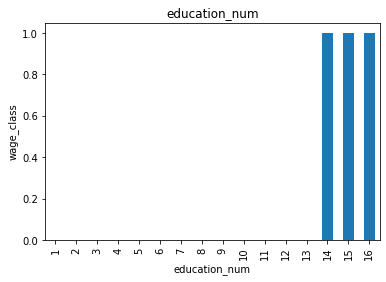

In [ ]:
data.groupby('education_num')['wage_class'].median().plot.bar()
plt.xlabel('education_num')
plt.ylabel('wage_class')
plt.title('education_num')
plt.show()

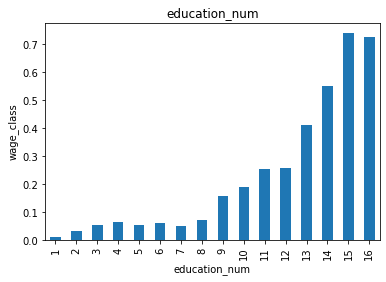

In [ ]:
data.groupby('education_num')['wage_class'].mean().T.plot.bar()
plt.xlabel('education_num')
plt.ylabel('wage_class')
plt.title('education_num')
plt.show()

SO we look into the mean plot we can find that on an average the values on education number is getting increases and if we look into the median plot we can find the median values are only exits in 14 , 15 and 16 education number .

*Conclusion : wage_class having greater than 50k heavily exist we a person is having education number in 14, 15 and 16 the groups.*

# continous features

In [ ]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]
print("Continuous feature Count {} and these are {} ".format(len(continuous_feature),continuous_feature ))

Continuous feature Count 6 and these are ['Unnamed: 0', 'age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'] 


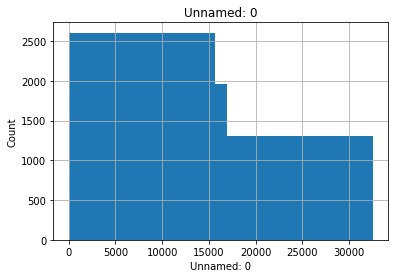

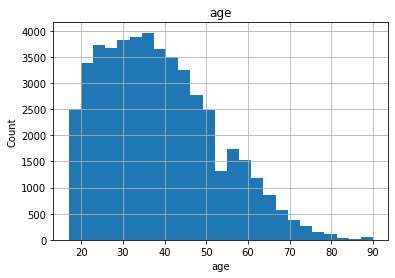

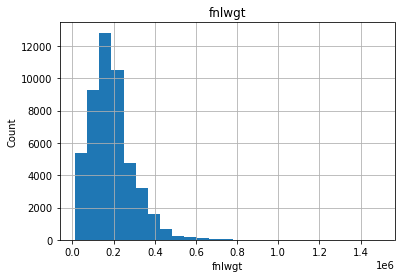

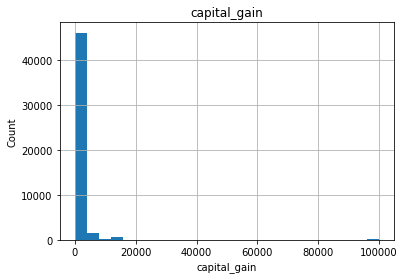

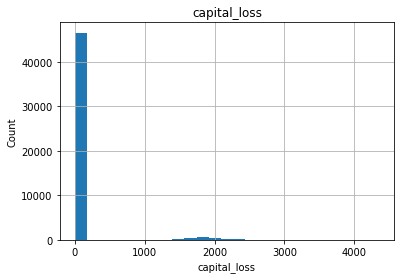

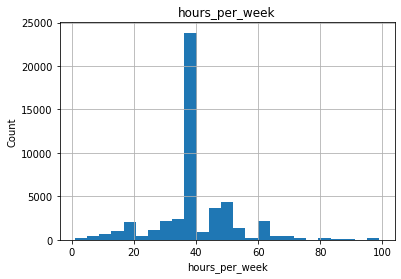

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    df=data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

if we look into the histogram plot we can see that the data is not normally distributed . hence we need to do scaling of these features .

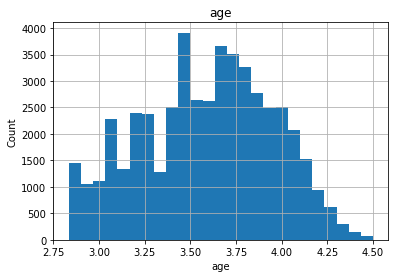

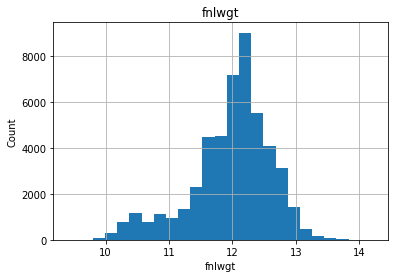

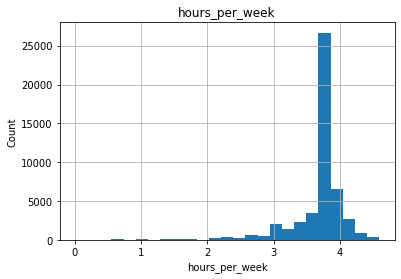

In [ ]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

Ok so now the distribution is qute good let's check with standardization 

In [ ]:
# this steps will include in feature engineering
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df = data[continuous_feature]

In [ ]:
df = pd.DataFrame(scale.fit_transform(df), columns= continuous_feature)

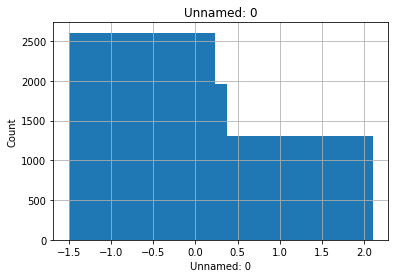

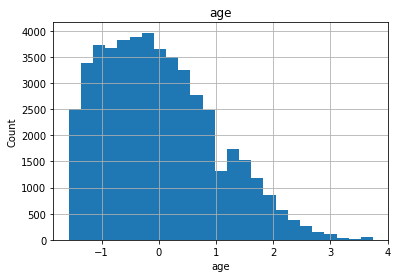

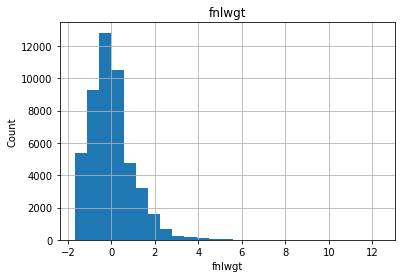

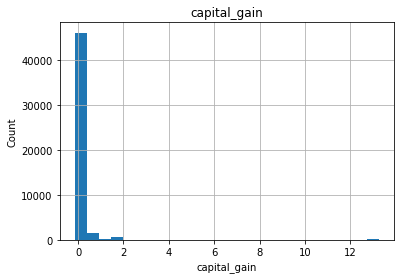

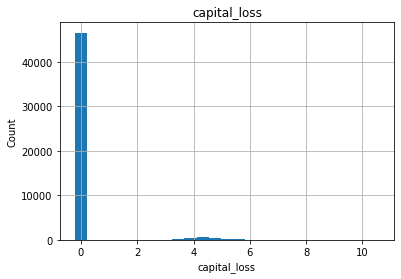

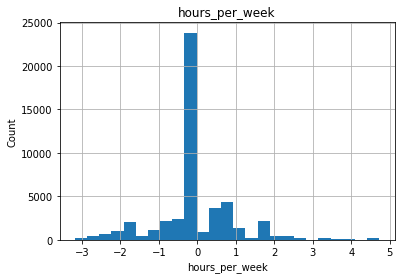

In [ ]:
for feature in df.columns:
        df[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

Log transformation work little good in the dataset.

Outliers

32561


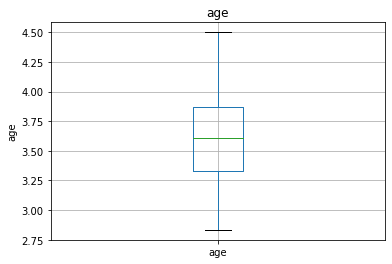

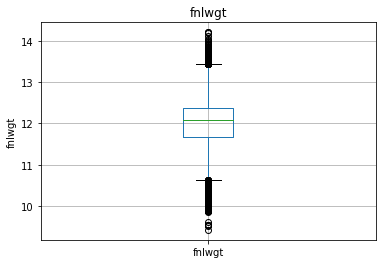

123
99


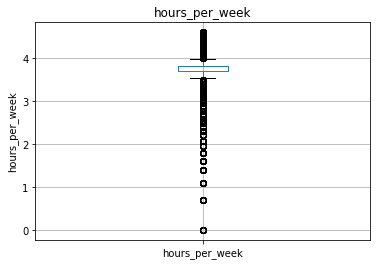

In [ ]:
for feature in continuous_feature:
    df=data.copy()
    if 0 in df[feature].unique():
        print(len(df[feature].unique()))
        # this represent that this feature can be still consider as descreate variable not the continues one
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Conclusion :  Age column has no outliers but fnlwgt and hours_per_week has many numbers of outliers present. We need to remove the outliers from these columns .

# Categorical Variables

In [ ]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [ ]:
data[categorical_features].head()


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is workclass and number of categories are 10
The feature is education and number of categories are 16
The feature is marital_status and number of categories are 7
The feature is occupation and number of categories are 16
The feature is relationship and number of categories are 6
The feature is race and number of categories are 5
The feature is sex and number of categories are 2
The feature is native_country and number of categories are 43
The feature is wage_class and number of categories are 4


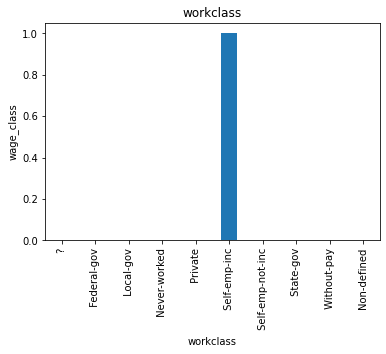

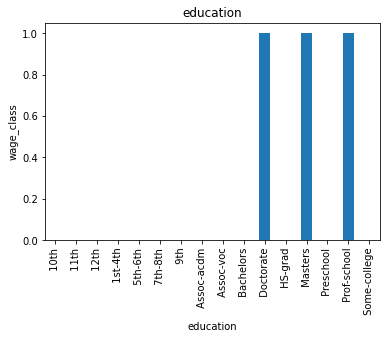

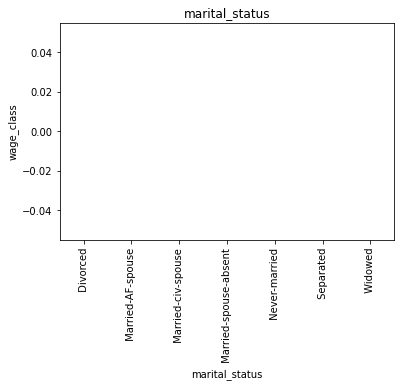

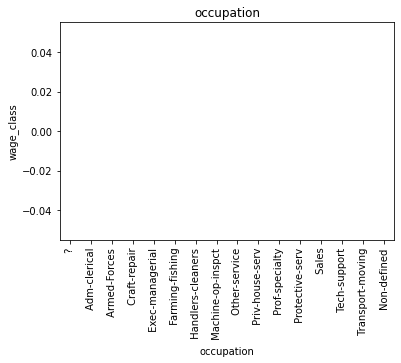

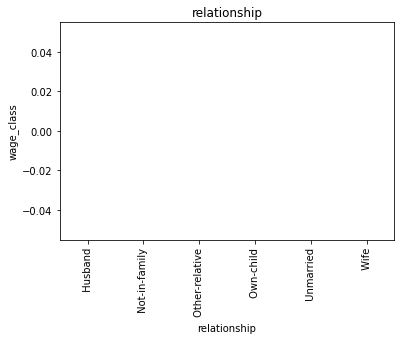

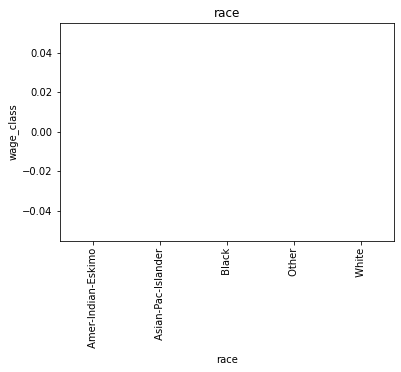

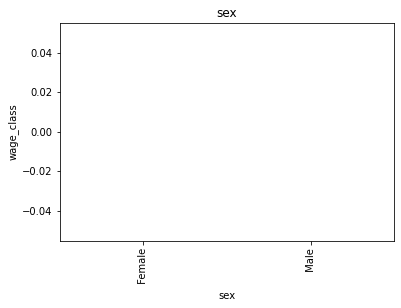

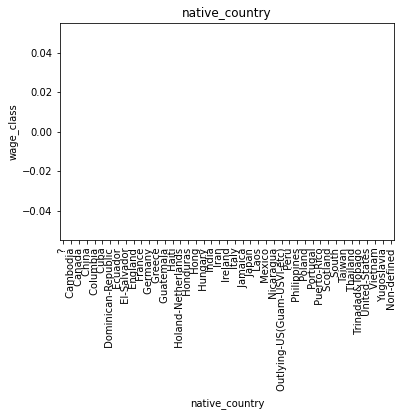

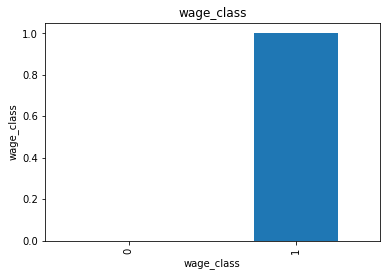

In [ ]:
# categorical variable and class
for feature in categorical_features:
    df=data.copy()
    df['wage_class'] = df['wage_class'].map(wage_class)
    df.groupby(feature)['wage_class'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('wage_class')
    plt.title(feature)
    plt.show()

Conclusion : wage class > 50k exist having to one where the education of a person is prof-schooling, masters or doctrate label and work class having self-emp inc.

In [5]:
data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
len(np.unique(data['education']))

16

In [8]:
len(np.unique(data['education_num']))

16